<a href="https://colab.research.google.com/github/RakeshBB08/Deep_learning/blob/master/improved_model_for_cifar10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Batch normalisation does apply gradient descent on every batch of the data
# it is genrally applied after every CNN layer
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [6]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train,y_train)
print(x_train.shape)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [7]:

y_test,y_train = y_test.flatten(),y_train.flatten()

In [8]:
# number of classes
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [12]:
# Building the model using the functional API
i = Input(shape = x_train[0].shape)
# x = Conv2D(32,(3,3),strides =2,activation = 'relu')(i)
# x = Conv2D(64,(3,3),strides =2,activation = 'relu')(x)
# x = Conv2D(128,(3,3),strides = 2, activation = 'relu')(x)
# VGG inspired

x = Conv2D(32,(3,3),activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128,(3,3),activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation = 'softmax')(x)

model = Model(i,x)

In [11]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
r = model.fit(x_train,y_train, validation_data = (x_test,y_test),epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 261s 166ms/step - loss: 1.3213 - accuracy: 0.5375 - val_loss: 1.1800 - val_accuracy: 0.5882
Epoch 2/15
1563/1563 [==============================] - 268s 171ms/step - loss: 0.8823 - accuracy: 0.6935 - val_loss: 0.8440 - val_accuracy: 0.7063
Epoch 3/15
1563/1563 [==============================] - 257s 164ms/step - loss: 0.7217 - accuracy: 0.7505 - val_loss: 0.7073 - val_accuracy: 0.7574
Epoch 4/15
1563/1563 [==============================] - 255s 163ms/step - loss: 0.6150 - accuracy: 0.7863 - val_loss: 0.6875 - val_accuracy: 0.7689
Epoch 5/15
1563/1563 [==============================] - 264s 169ms/step - loss: 0.5246 - accuracy: 0.8198 - val_loss: 0.8060 - val_accuracy: 0.7426
Epoch 6/15
1563/1563 [==============================] - 257s 164ms/step - loss: 0.4484 - accuracy: 0.8451 - val_loss: 0.6221 - val_accuracy: 0.7938
Epoch 7/15
1563/1563 [==============================] - 253s 162ms/step - loss: 0.3870 - accuracy: 0.8649 - val_

In [17]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [20]:
# Fit with dataaugumentation
# Note: If u run this after calling the previous model.fit() it will continue training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1,height_shift_range = 0.2,horizontal_flip = True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator,validation_data = (x_test,y_test),steps_per_epoch = steps_per_epoch,epochs = 1)

<ipython-input-20-20320ba5a7ba>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator,validation_data = (x_test,y_test),steps_per_epoch = steps_per_epoch,epochs = 1)


1562/1562 [==============================] - 276s 177ms/step - loss: 1.0801 - accuracy: 0.6203 - val_loss: 0.9878 - val_accuracy: 0.6642


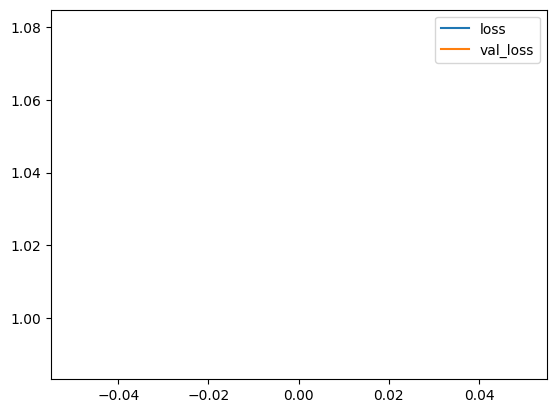

In [21]:
# plotting the loss
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

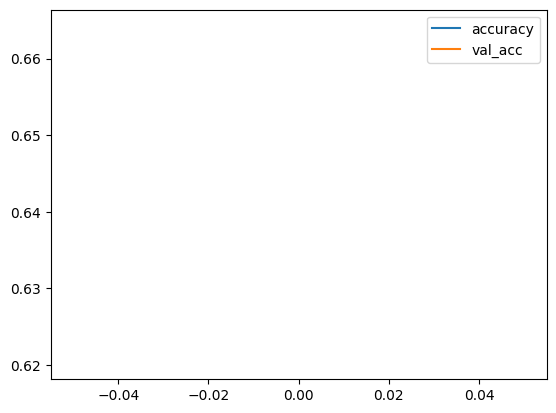

In [22]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   